# One sample test against population statistics
1. Population mean
2. Population proportion
3. Population variance

# Population mean

## 1. Packages

In [1]:
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm
import numpy as np
import pandas as pd

## 2. Random data generation

In [2]:
# Assume we have a sample data following a normal distribution
# with mean closes to 776, standard deviation closes to 16, and sample size = 25
sample_data = np.random.normal(loc = 776, scale = 16 ,size = 25)

In [3]:
print(round(np.mean(sample_data), 4))
print(round(np.std(sample_data), 4))
print(len(sample_data))

777.4707
15.0359
25


## 3. Test normality assumption

In [4]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt 
import seaborn as sb

In [5]:
# Set the default visualziation configuration
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)

### Method 1. Density Plot

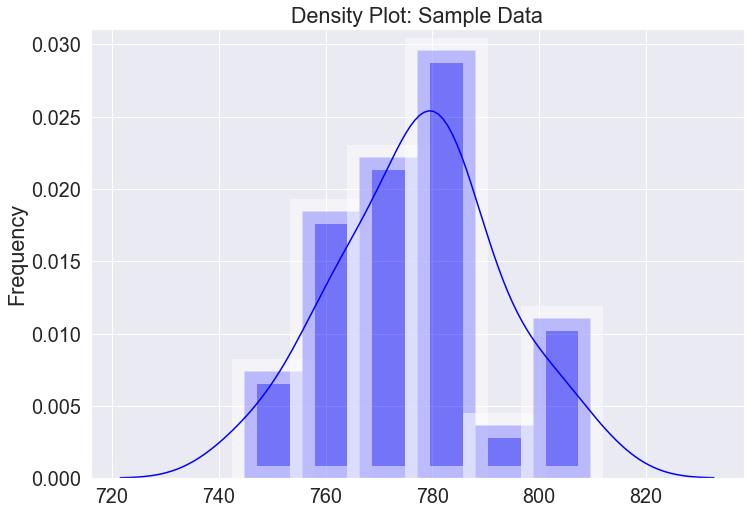

In [6]:
ax = sb.distplot(sample_data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Density Plot: Sample Data', ylabel = 'Frequency')
plt.show()

### Method 2. Visualization - Quantile-Quantile Plot

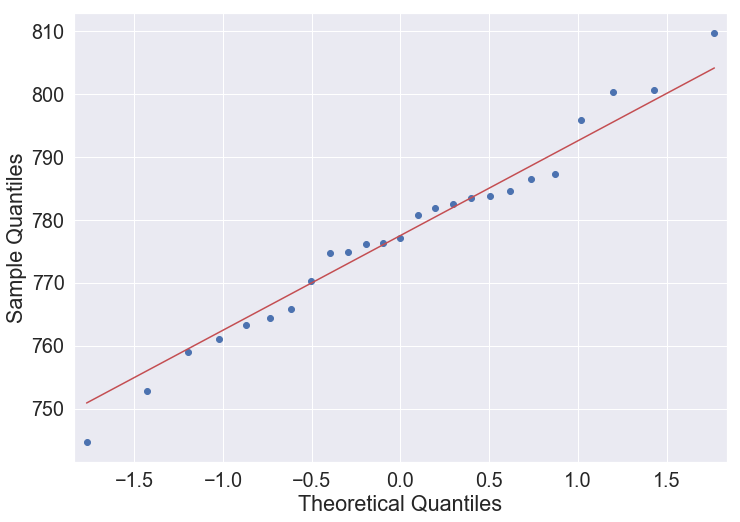

In [7]:
qqplot(sample_data, line='s')
plt.show()

### Method 3. Statistical Testing - Using Shapiro-Wilk Test

In [8]:
from scipy.stats import shapiro

In [9]:
stat, p = shapiro(sample_data)
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)', p)
else:
    print('Sample does not look Gaussian (reject H0)', p)

Sample looks Gaussian (fail to reject H0) 0.9632759690284729


## 4. Hypothesis testing of population mean (with an example)

### Assumptions in Z-test
- **A random sample from a normal population with known variance, or**
- **Sample size is larger than 30 (if variance is unknown, it can be approximated by sample variance)**

### Question
- **A producer of cereal is producing boxes of cereal with a stated weight of 750 grams. It is known from a large body of past experience that the standard deviation of the weights in their filling process is approximately 16 grams. In order to ensure that not many boxes are underfilled, the producer sets the mean fill amount at 780 grams. As part of the quality control process, they periodically draw a random sample of 25 boxes, measure the weights, and test the null hypothesis that the mean fill amount is 780.**

$$H_0: \mu = 780$$
$$H_a: \mu \neq 780$$

In [10]:
# Want to test whether the mean in the sample data is close to the population mean (780)
population_mean = 780

# From above normality testing results, the sample data is normally distributed, we can do z-test
z_test_statistic = stests.ztest(sample_data, value = population_mean, alternative = 'two-sided')
p_value = z_test_statistic[1]
print("p-value is: "+ str(p_value))
print("")

p-value is: 0.40989281032476976



In [11]:
# Conclusion: There is little or no evidence that the true mean weight 
# of the filling process differs from 780 grams.
alpha = 0.05
if p_value > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

Fail to reject H0


In [12]:
z_test_statistic

(-0.8240822757942142, 0.40989281032476976)

$$Z = \frac {\bar {x} - \mu} {\frac{\sigma} {\sqrt{n}}}$$

In [13]:
# Hand calculation of Z test statistic (close to the above result)
(777.4707 - 780) / (15.0359 / 5)

-0.841086998450387

- **Construct a 95% confidence interval**

$$SE(\bar{x}) = \frac {\sigma} {\sqrt{n}}$$
$$P(\bar{x} - Z_{\alpha/2} * SE(\bar{x}) < \mu < \bar{x} + Z_{\alpha/2} * SE(\bar{x})) = 1 - \alpha$$

In [14]:
SE_X = 15.0359 / 5
upper_bound = 777.4707 + norm.interval(0.95, loc = 0, scale = 1)[1]*SE_X
lower_bound = 777.4707 - norm.interval(0.95, loc = 0, scale = 1)[1]*SE_X

In [15]:
lower_bound, upper_bound

(771.5767355049708, 783.3646644950292)

# Population proportion

## 1. Hypothesis testing of population proportion (with an example)

### Question
- **In a telephone poll of 1000 adult Americans, 440 said that they are interested in buying a new released product.**

- **Test the null hypothesis that the true proportion is 0.5.**

$$H_0: p = 0.5$$
$$H_a: p < 0.5$$

In [16]:
count = 440
n_obs = 1000
population_p = 0.5
stat, pval = proportions_ztest(count, n_obs, population_p)
print('Test statistic is:', round(stat, 4))
print('P-value is:', round(pval, 4))

Test statistic is: -3.8224
P-value is: 0.0001


$$Z = \frac {\hat {p} - p_0} {SE_0(\hat {p})}$$

In [17]:
# Hand calculation
SE_0 = (((count/n_obs)*(1 - (count/n_obs))) / n_obs)**(1/2)
z_test_statistic = ((count/n_obs) - population_p) / SE_0
p_value = norm.cdf(z_test_statistic, loc = 0, scale = 1)

In [18]:
print('Test statistic is:', round(z_test_statistic, 4))
print('P-value is:', round(p_value, 4))

Test statistic is: -3.8224
P-value is: 0.0001


In [19]:
# However, for python, there is a problem for handling number with many decimal points
# First, calculate SE0
((0.5*(1-0.5)) / 1000)**(1/2)

0.015811388300841896

In [20]:
# Z test statistic
(0.44 - 0.5)/0.015811388300841896

-3.7947331922020555

In [21]:
# P-value
norm.cdf(-3.7947, loc = 0, scale = 1)

7.391104190949198e-05

- **Construct a 95% confidence interval for p.**

$$SE_0(\hat{p}) = \sqrt{\frac {\hat{p}*(1-\hat{p})} {n}} $$

$$ P(\hat{p} - Z_{\alpha/2}*SE_0(\hat{p}) < p < \hat{p} + Z_{\alpha/2}*SE_0(\hat{p})) = 1 -\alpha$$

In [22]:
upper_range = (count / n_obs) + norm.interval(0.95, loc = 0, scale = 1)[1]*SE_0
lower_range = (count / n_obs) + norm.interval(0.95, loc = 0, scale = 1)[0]*SE_0

In [23]:
print('The 95% confidence interval for p is', round(lower_range, 4), round(upper_range, 4))

The 95% confidence interval for p is 0.4092 0.4708


# Population variance

$$ \chi^2 = \frac {(n-1)*S^2} {\sigma_0^2}$$

## 1. Hypothesis testing of population variance (with an example)

In [24]:
from scipy.stats import chi2

In [25]:
def my_chi_square(data, h0, side, direction):
    '''
    Perform a chi-square test for population variance
    
    data: a list of data
    h0: population variance under the null hypothesis
    side: either one or two sided
    
    Output: Return p value
    '''
    sample_var = np.var(data, ddof = 1)
    chi_statistic = ((len(data) - 1)*sample_var) / h0
    
    if side == 'one':
        if direction == 'left':
            p_value = 1 - chi2.cdf(chi_statistic, len(data) - 1)
        elif direction == 'right':
             p_value = chi2.cdf(chi_statistic, len(data) - 1)
        
    elif side == 'two':
        p_value = min(1 - chi2.
                      cdf(chi_statistic, len(data) - 1), chi2.cdf(chi_statistic, len(data) - 1))       
        p_value = p_value * 2
        
    return p_value

### Question
- **At a cereal filling plant quality control engineers do not want the variance of the weights of 750 gram cereal boxes to exceed 100 grams^2.**
- **Test the null hypothesis that the true population variance is 100.**

$$H_0: \sigma^2 = 100$$
$$H_a: \sigma^2 > 100$$

In [26]:
my_data = [775, 780, 781, 795, 803, 810, 823]
alpha_level = 0.05
p_value = my_chi_square(my_data, h0 = 100, side = 'one', direction = 'left')
p_value

0.004276065734803103

In [27]:
# Conclusion: We have a very strong evidence (p = 0.004) that 
# the true variance of the weights of cereal in boxes is greater than 100.
if p_value < alpha_level:
    print('Reject H0')
else:
    print('Do not reject H0')

Reject H0


- **Find a 95% of confidence interval for sigma^2**

$$ P( \frac {(n-1)*S^2} {\chi^2_{\alpha/2}} <= \sigma^2 <= \frac {(n-1)*S^2} {\chi^2_{1-{\alpha/2}}}) = 1 - \alpha $$

In [28]:
lower_bound = ((len(my_data) - 1) * np.var(my_data, ddof = 1)) / chi2.ppf(0.975, 6)
upper_bound = ((len(my_data) - 1) * np.var(my_data, ddof = 1)) / chi2.ppf(0.025, 6)

In [29]:
round(lower_bound, 4), round(upper_bound, 4)

(131.0388, 1530.2359)